In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics


# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [344]:
df = pd.read_csv('spam_or_not_spam.zip')

In [345]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

<AxesSubplot: title={'center': 'Распределение обьектоа по классам'}, xlabel='label'>

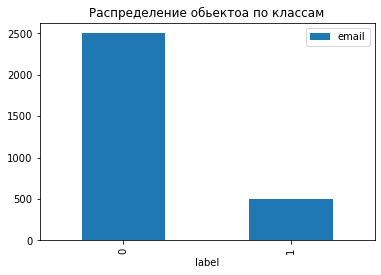

In [346]:
# визуализируйте результат: ваш код здесь
df.groupby('label').count().plot(kind = 'bar', title = 'Распределение обьектоа по классам')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [347]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB


Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [348]:
df['email'] = df['email'].replace({'' : np.nan, ' ' : np.nan})
df = df.dropna()

Переводим данные в векторный вид:

In [349]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [350]:
X.shape

(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [351]:
y = df['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [352]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [353]:
y_test.mean()

0.17733333333333334

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [354]:
clf_ = MultinomialNB(alpha=0.01)
clf_M.fit(X_train, y_train)
y_pred_M = clf_M.predict(X_test)
y_proba = clf_M.predict_proba(X_test)

In [355]:
clf_C = ComplementNB(alpha=0.01)
clf_C.fit(X_train, y_train)
y_pred_C = clf_C.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [356]:
print('MultinomialNB')
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_M):.5}")
print(f'Prcision: {metrics.precision_score(y_test, y_pred_M):.3}')
print(f'Recall: {metrics.recall_score(y_test, y_pred_M):.5}')
print(f'F1: {metrics.f1_score(y_test, y_pred_M):.3}')
print('\n')
print('ComplementNB')
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_C):.5}")
print(f'Prcision: {metrics.precision_score(y_test, y_pred_C):.5}')
print(f'Recall: {metrics.recall_score(y_test, y_pred_C):.5}')
print(f'F1: {metrics.f1_score(y_test, y_pred_C):.5}')

MultinomialNB
Accuracy: 0.99067
Prcision: 0.977
Recall: 0.96992
F1: 0.974


ComplementNB
Accuracy: 0.99067
Prcision: 0.97727
Recall: 0.96992
F1: 0.97358


Нарисуйте ROC-кривую:

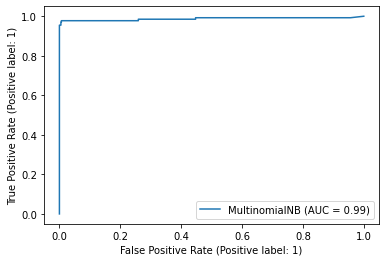

In [357]:

metrics.RocCurveDisplay.from_estimator(clf_M, X_test, y_test)
#display.plot()
plt.show()

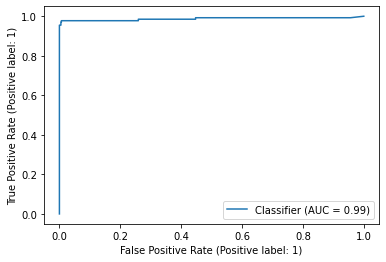

In [358]:
display = metrics.RocCurveDisplay.from_predictions(y_test, y_proba[:,1])
#display.plot()
plt.show()

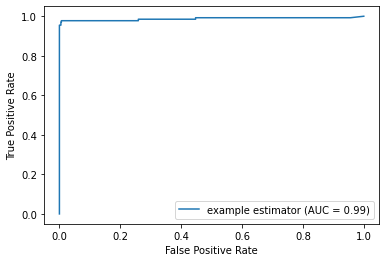

In [359]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [360]:

param_dist = {'alpha' : np.linspace(0.01,1,10)}
random_search = RandomizedSearchCV(
    estimator = clf_C,
    param_distributions = param_dist,
    cv = 5,
    n_iter = 10
)
random_search.fit(X_train, y_train)
random_search.best_params_

{'alpha': 0.12}

In [361]:
clf_best = random_search.best_estimator_
y_pred_best = clf_best.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_best):.5}")
print(f'Prcision: {metrics.precision_score(y_test, y_pred_best):.5}')
print(f'Recall: {metrics.recall_score(y_test, y_pred_best):.5}')
print(f'F1: {metrics.f1_score(y_test, y_pred_best):.5}')


Accuracy: 0.99067
Prcision: 0.97727
Recall: 0.96992
F1: 0.97358


С помощью кросс-валидации найдено лучшее значение alpha=0.12, по сравнению с alpha=0.01 качество мадели на уровне точности 5 знаков после запятой не изменилось